In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
file = open("hindi.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  गोस्वामी तुलसीदासजी को रामायण से बढ़ कर हिन्दीसाहित्य में दूसरा र 

The Last Line:  ब्राह्मणों फे पट्टे.ललौटबा दिये । 



In [ ]:
#cleaning the text
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'गोस्वामी तुलसीदासजी को रामायण से बढ़ कर हिन्दीसाहित्य में दूसरा र  है। ऐसा फोन साहित्य-लेची देगा जो रामंचरितमानस से थोड़ा बहुत परिचय न कह लीक  भादर भारतवष के कोने कोने में राजाधिराजों के मद॒ल्रों से क्षेकर कंगाल की झोपड़ी पथ्य॑न्\u200d्त है  भर प्रचार में ते यह घाल्मीकीय से भ कई गुना पढ़ा हुआ है | विविध मतान्ुयायी और मिश्च धर्मा  घलस्बी भी आदरणीय मान कर इसके उपरे'

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'गोस्वामी तुलसीदासजी को रामायण से बढ़ कर हिन्दीसाहित्य में दूसरा र  है। ऐसा फोन साहित्य लेची देगा जो रामंचरितमानस से थोड़ा बहुत परिचय न कह लीक  भादर भारतवष के कोने कोने में राजाधिराजों के मद॒ल्रों से क्षेकर कंगाल की झोपड़ी पथ्य॑न्\u200d्त है  भर प्रचार में ते यह घाल्मीकीय से भ कई गुना पढ़ा हुआ है   विविध मतान्ुयायी और मिश्च धर्मा  घलस्बी भी आदरणीय मान कर इसके उपरेशों से लाभ उठाते हैं। अनेक भाषाओं में अनूदित होकर  यद भिन्न मिन्न देशों में सम्मान पा रहा दे भारतीयों में ते कितने हो भावुझ जन ऐसे ऐ ग जो  र'

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'गोस्वामी तुलसीदासजी को रामायण से बढ़ कर हिन्दीसाहित्य में दूसरा र है। ऐसा फोन साहित्य-लेची देगा जो रामंचरितमानस थोड़ा बहुत परिचय न कह लीक भादर भारतवष के कोने राजाधिराजों मद॒ल्रों क्षेकर कंगाल की झोपड़ी पथ्य॑न्\u200d्त है भर प्रचार ते यह घाल्मीकीय भ कई गुना पढ़ा हुआ | विविध मतान्ुयायी और मिश्च धर्मा घलस्बी भी आदरणीय मान इसके उपरेशों लाभ उठाते हैं। अनेक भाषाओं अनूदित होकर यद भिन्न मिन्न देशों सम्मान पा रहा दे भारतीयों कितने हो भावुझ जन ऐसे ऐ|ग रामचरितमानस का पाठ किये बिना जल तक नहीं हण फरते झोजरुवी म र'

In [ ]:
#tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[91, 321, 92, 93, 9, 322, 24, 323, 25, 324]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

5655


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  6153


array([[ 91, 321],
       [321,  92],
       [ 92,  93],
       [ 93,   9],
       [  9, 322],
       [322,  24],
       [ 24, 323],
       [323,  25],
       [ 25, 324],
       [324, 325]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 91 321  92  93   9]
The responses are:  [321  92  93   9 322]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#creating the model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(3000, return_sequences=True))
model.add(LSTM(3000))
model.add(Dense(3000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

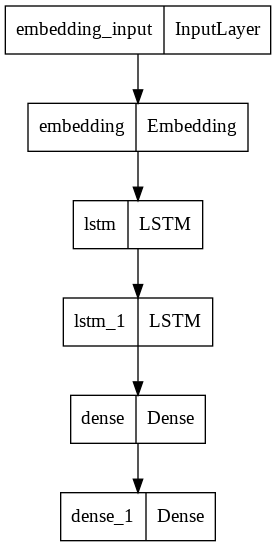

In [ ]:
#plotting the model
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [ ]:
#compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#fit model
model.fit(X, y, epochs=5, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/5
97/97 [==============================] - ETA: 0s - loss: 8.6560
Epoch 00001: loss improved from inf to 8.65598, saving model to nextword1.h5
97/97 [==============================] - 157s 2s/step - loss: 8.6560 - lr: 0.0010
Epoch 2/5
97/97 [==============================] - ETA: 0s - loss: 8.6415
Epoch 00002: loss improved from 8.65598 to 8.64153, saving model to nextword1.h5
97/97 [==============================] - 156s 2s/step - loss: 8.6415 - lr: 0.0010
Epoch 3/5
97/97 [==============================] - ETA: 0s - loss: 8.6405
Epoch 00003: loss improved from 8.64153 to 8.64051, saving model to nextword1.h5
97/97 [==============================] - 154s 2s/step - loss: 8.6405 - lr: 0.0010
Epoch 4/5
97/97 [==============================] - ETA: 0s - loss: 8.6396
Epoch 00004: loss improved from 8.64051 to 8.63955, saving model to nextword1.h5
97/97 [==============================] - 153s 2s/step - loss: 8.6396 - lr: 0.0010
Epoch 5/5
97/97 [==============================] - ETA: 

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
pip freeze > requirements.txt

In [ ]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from textblob import TextBlob

app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
# Load the model and tokenizer
model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))
@app.route('/',methods=['GET'])
def home():
  return render_template('Hmain.html')
@app.route('/panchtantra',methods=['GET'])
def next():
  return render_template('panchtantra.html')
@app.route('/check', methods=['POST'])
def check():
  if request.method == 'POST':
    phrase = request.form['phrase']
    prediction=Predict_Next_Words(model, tokenizer, phrase)
  return render_template('panchtantra.html',output=prediction) 
@app.route('/correct', methods=['POST'])
def correct():
    if request.method == 'POST':
        input = request.form['input']
        text = TextBlob(input)
    return render_template('panchtantra.html', input=text, output1=text.correct())

if __name__ == "__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://20b8-34-73-98-158.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [06/Dec/2021 06:03:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:49] "GET /static/twofrogs.png HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:49] "GET /static/boy_wolf.png HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:49] "GET /static/the_girl_kingdom.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:50] "GET /static/hindi2.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:50] "GET /static/panchtantra.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:50] "GET /static/hindi1.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:50] "GET /static/agnigundum.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:50] "GET /static/telgu1.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:50] "GET /static/telgu2.jpg HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 06:03:51] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Dec/2021 06:03:54] "GET /panchtantra HTTP/1.1" 200 -


127.0.0.1 - - [06/Dec/2021 06:04:05] "POST /check HTTP/1.1" 200 -


राम
